In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from datetime import datetime as dt




In [3]:
df = pd.read_excel('Clean_Data.xlsx')

In [4]:
df.head()

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df['Month'] = pd.DatetimeIndex(df['DateTime']).month

In [7]:
df['DayOfWeek'] = pd.DatetimeIndex(df['DateTime']).dayofweek

In [8]:
df['HourofDay'] = pd.DatetimeIndex(df['DateTime']).hour

In [9]:
df['Day'] = pd.DatetimeIndex(df['DateTime']).day

In [10]:
print(len(df))

29676


In [11]:
for i in range(len(df)):
    if df['Month'][i] == 12:
        df['Month'][i] = 'December'
    elif df['Month'][i] == 1:
        df['Month'][i] = 'January'
    elif df['Month'][i] == 2:
        df['Month'][i] = 'February'
    else:
        df['Month'][i] = 'March'

<ipython-input-11-232888a3e9f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'][i] = 'December'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-232888a3e9f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'][i] = 'January'
<ipython-input-11-232888a3e9f3>:7: SettingWithCopyW

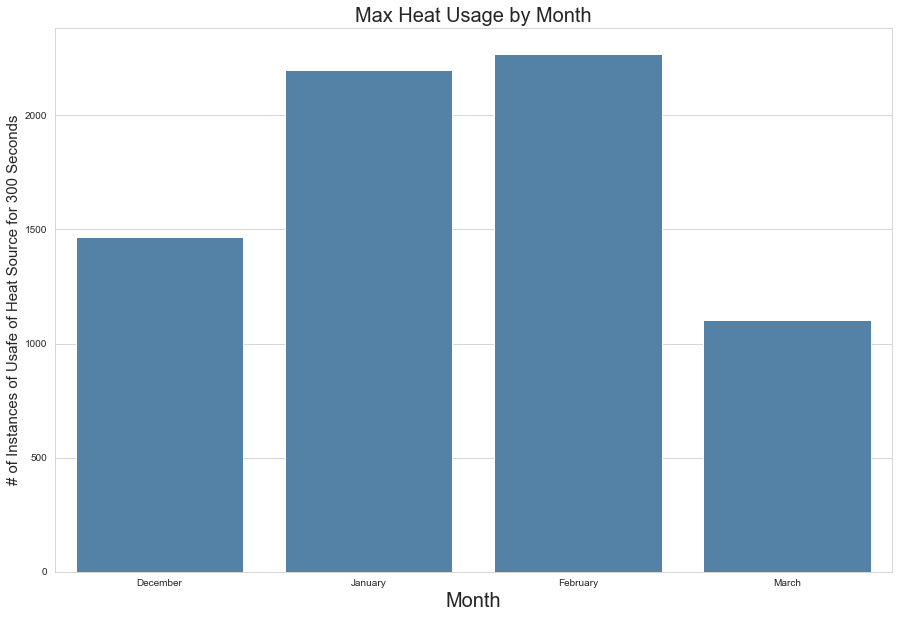

In [12]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot(data = df[df['Heat Stage 1 (sec)'] == 300], x = 'Month', color = 'steelblue', order = ['December','January','February','March'])
maxHeatUsage.set_xlabel('Month', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Month', fontsize = 20)
plt.show()

In [13]:
for i in range(len(df)):
    if df['DayOfWeek'][i] == 0:
        df['DayOfWeek'][i] = 'Monday'
    elif df['DayOfWeek'][i] == 1:
        df['DayOfWeek'][i] = 'Tuesday'
    elif df['DayOfWeek'][i] == 2:
        df['DayOfWeek'][i] = 'Wednesday'
    elif df['DayOfWeek'][i] == 3:
        df['DayOfWeek'][i] = 'Thursday'
    elif df['DayOfWeek'][i] == 4:
        df['DayOfWeek'][i] = 'Friday'
    elif df['DayOfWeek'][i] == 5:
        df['DayOfWeek'][i] = 'Saturday'
    else:
        df['DayOfWeek'][i] = 'Sunday'

<ipython-input-13-076d769337bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'][i] = 'Thursday'
<ipython-input-13-076d769337bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'][i] = 'Friday'
<ipython-input-13-076d769337bf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'][i] = 'Saturday'
<ipython-input-13-076d769337bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy o

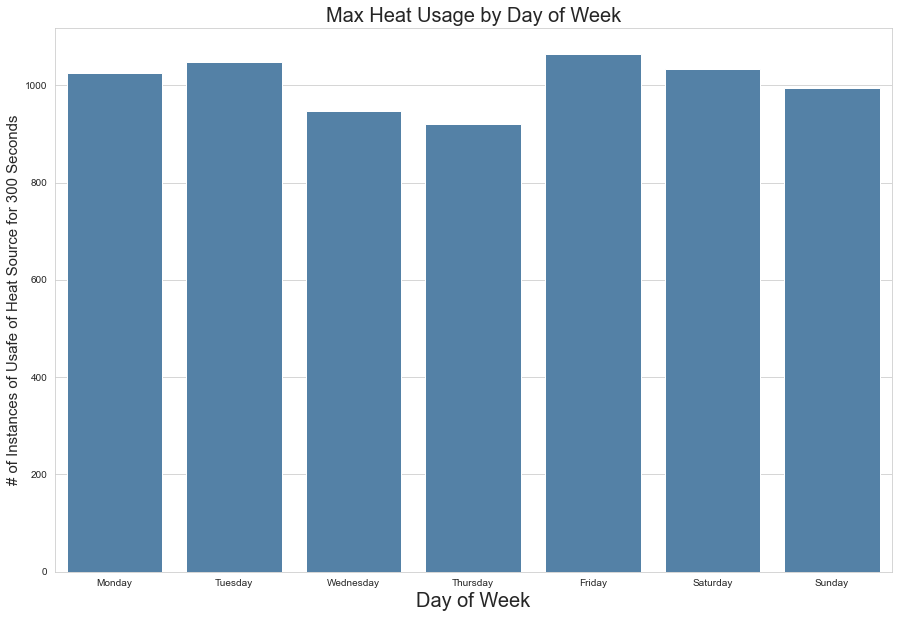

In [14]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot(data = df[df['Heat Stage 1 (sec)'] == 300], x = 'DayOfWeek', color = 'steelblue', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
maxHeatUsage.set_xlabel('Day of Week', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Day of Week', fontsize = 20)
plt.show()

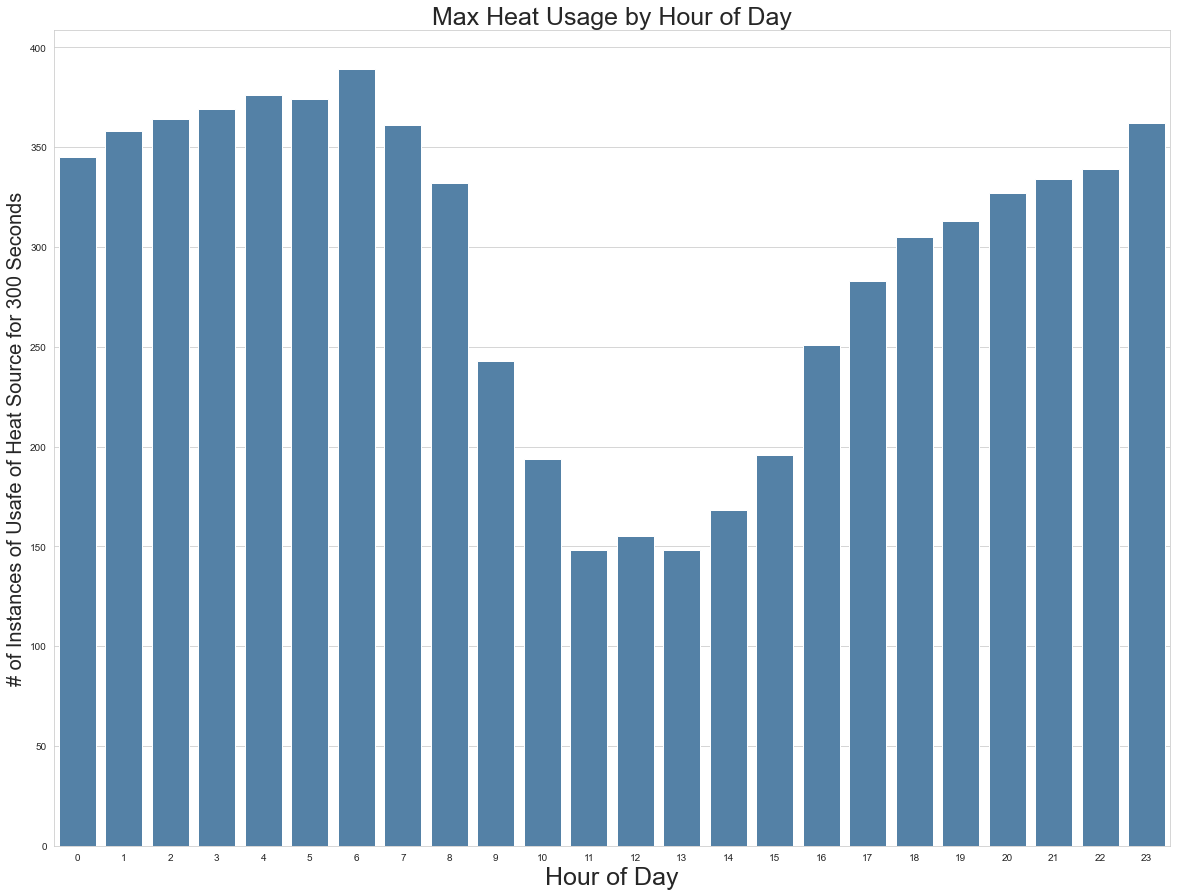

In [15]:
plt.figure(figsize = (20, 15))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot( data = df[df['Heat Stage 1 (sec)'] == 300], x = 'HourofDay', color = 'steelblue')
maxHeatUsage.set_xlabel('Hour of Day', fontsize = 25)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 20)
plt.title('Max Heat Usage by Hour of Day', fontsize = 25)
plt.show()

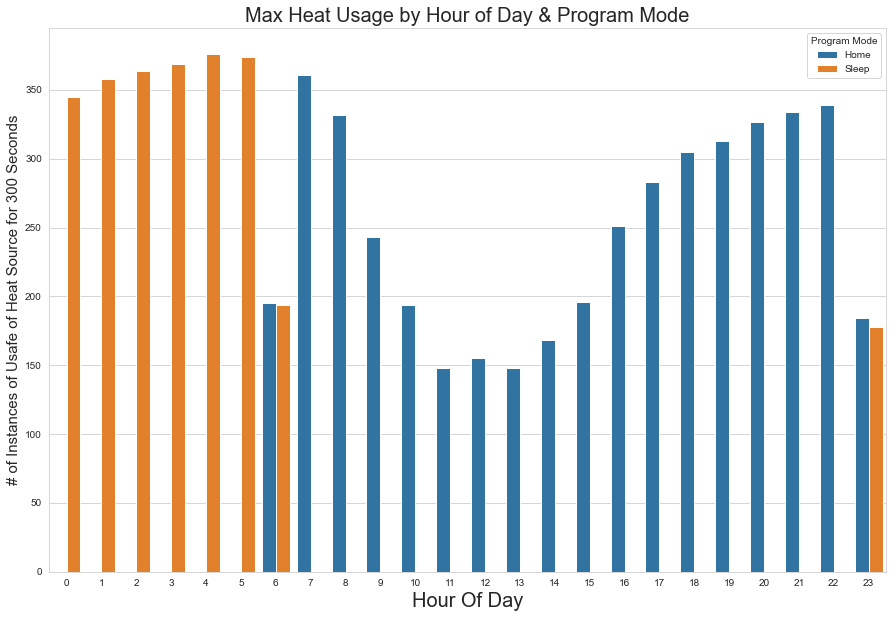

In [16]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot( data = df[df['Heat Stage 1 (sec)'] == 300], x = 'HourofDay', hue = 'Program Mode')
maxHeatUsage.set_xlabel('Hour Of Day', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Hour of Day & Program Mode', fontsize = 20)
plt.show()

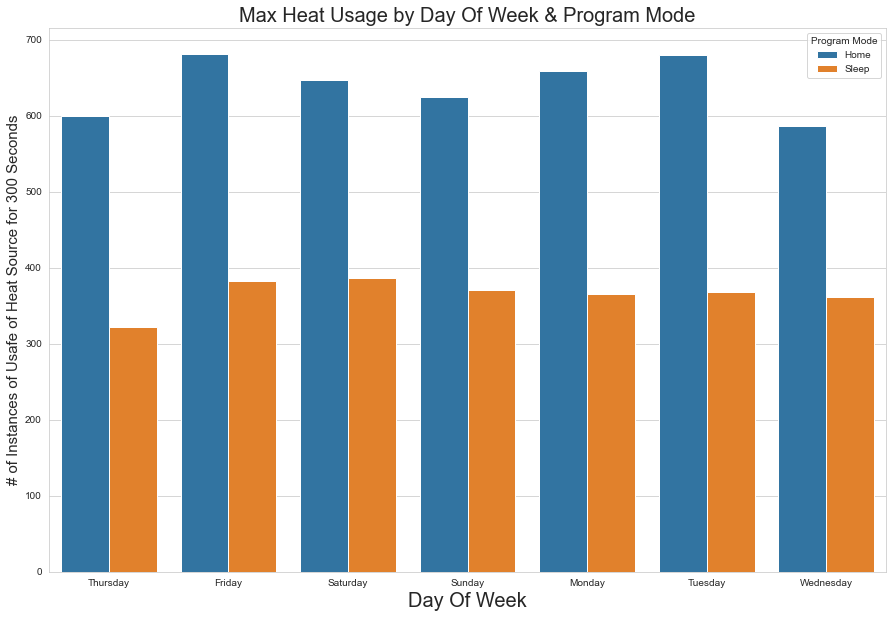

In [17]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot( data = df[df['Heat Stage 1 (sec)'] == 300], x = 'DayOfWeek', hue = 'Program Mode')
maxHeatUsage.set_xlabel('Day Of Week', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Day Of Week & Program Mode', fontsize = 20)
plt.show()

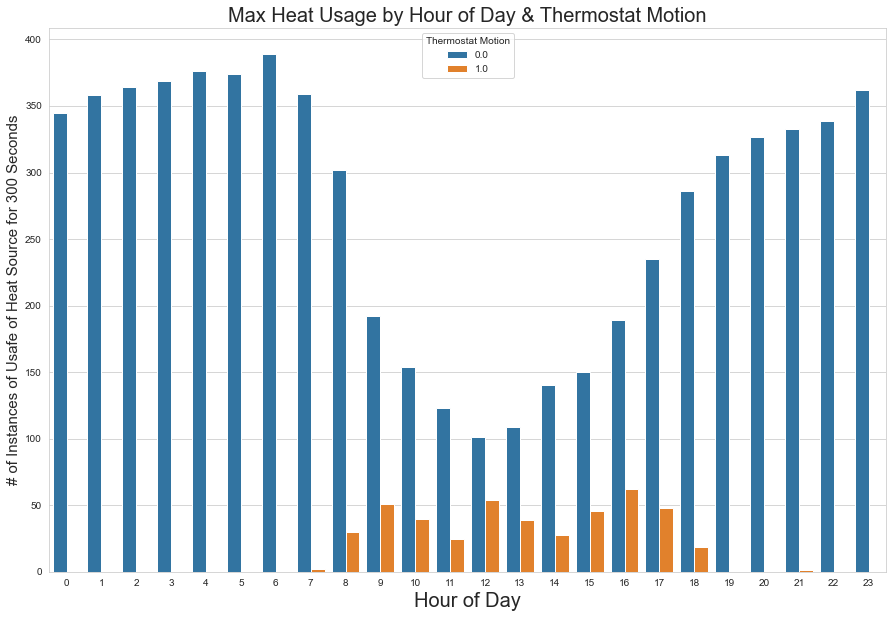

In [18]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot( data = df[df['Heat Stage 1 (sec)'] == 300], x = 'HourofDay', hue = 'Thermostat Motion')
maxHeatUsage.set_xlabel('Hour of Day', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Hour of Day & Thermostat Motion', fontsize = 20)
plt.show()

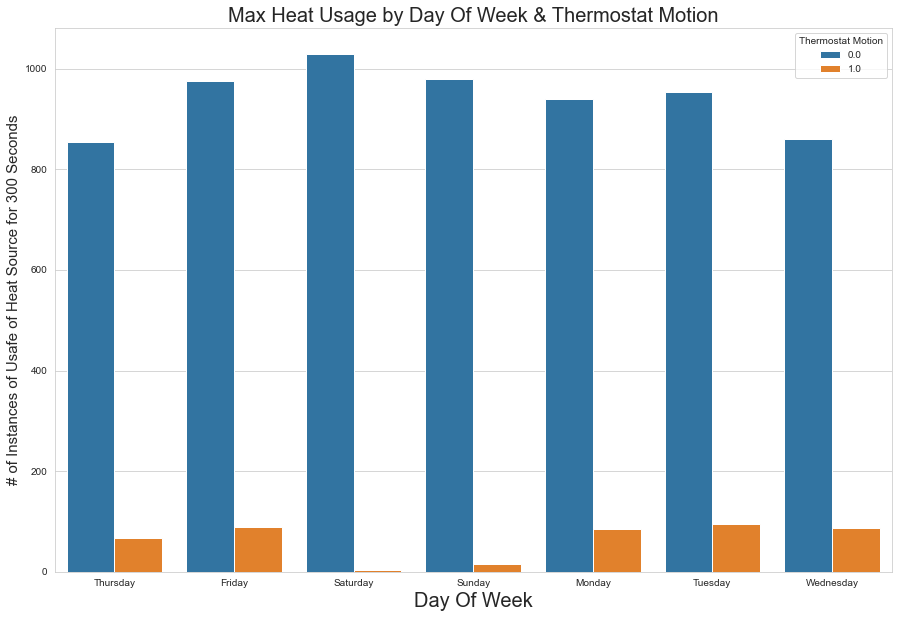

In [19]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
maxHeatUsage = sns.countplot( data = df[df['Heat Stage 1 (sec)'] == 300], x = 'DayOfWeek', hue = 'Thermostat Motion')
maxHeatUsage.set_xlabel('Day Of Week', fontsize = 20)
maxHeatUsage.set_ylabel('# of Instances of Usafe of Heat Source for 300 Seconds', fontsize = 15)
plt.title('Max Heat Usage by Day Of Week & Thermostat Motion', fontsize = 20)
plt.show()

In [20]:
df.groupby(['Month']).agg(np.mean)

,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Wind Speed (km/h),Cool Stage 1 (sec),Heat Stage 1 (sec),Fan (sec),Thermostat Temperature (C),...,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2,HourofDay,Day
Month,,,,,,,,,,,,,,,,,,,,,
December,21.0,21.0,20.820110,28.951307,-0.900226,0.0,0.0,115.084402,122.067035,20.820110,...,21.840464,0.001461,20.837543,0.399448,20.89328,0.000974,22.662068,0.015095,11.638952,20.761566
February,21.0,21.0,20.840303,20.610249,-5.576711,0.0,0.0,120.070728,125.717831,20.840303,...,21.518762,0.001861,20.638925,0.597220,20.58640,0.001613,21.996426,0.014394,11.500000,14.500000
January,21.0,21.0,20.822112,26.473342,-3.213038,0.0,0.0,114.938826,121.277921,20.822112,...,21.647772,0.000561,20.668683,0.387137,20.70495,0.003367,22.356157,0.015827,11.500000,16.000000
March,21.0,21.0,20.880583,21.871585,1.147462,0.0,0.0,80.718475,85.378916,20.880583,...,21.500262,0.008335,20.892854,0.180583,20.69537,0.000463,22.120960,0.023923,11.392187,11.810212


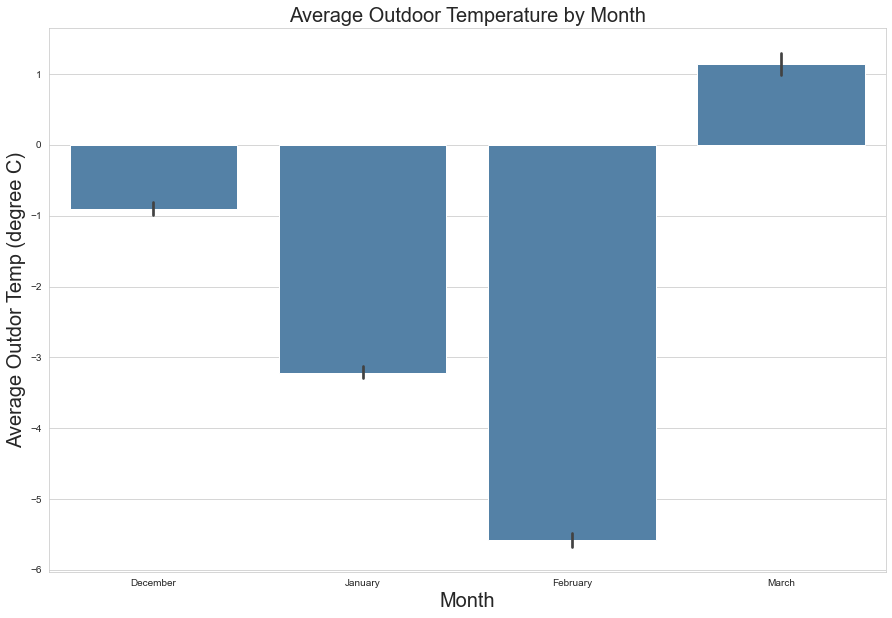

In [21]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
averageTemp = sns.barplot(x = df['Month'], y = df['Outdoor Temp (C)'], order = ['December','January','February','March'], color = 'steelblue')
averageTemp.set_xlabel('Month', fontsize = 20)
averageTemp.set_ylabel('Average Outdor Temp (degree C)', fontsize = 20)
plt.title('Average Outdoor Temperature by Month', fontsize = 20)
plt.show()

In [22]:
NG_Data = pd.read_excel('Cumulative_meter_NG_Data.xlsx')

In [23]:
NG_Data.head()

,Timestamp,Cumulative_meter,Ambient_temp_north_wall_C
0,2020-12-10 12:50:00,0.000000,4.390761
1,2020-12-10 13:00:00,6.766667,4.384753
2,2020-12-10 14:00:00,15.766667,4.507190
3,2020-12-10 15:00:00,23.533333,4.471141
4,2020-12-10 16:00:00,31.033333,2.838034


In [24]:
NG_Data['Timestamp'] = pd.to_datetime(NG_Data['Timestamp'])

In [25]:
NG_Data['Month'] = pd.DatetimeIndex(NG_Data['Timestamp']).month

In [26]:
NG_Data.head()

,Timestamp,Cumulative_meter,Ambient_temp_north_wall_C,Month
0,2020-12-10 12:50:00,0.000000,4.390761,12
1,2020-12-10 13:00:00,6.766667,4.384753,12
2,2020-12-10 14:00:00,15.766667,4.507190,12
3,2020-12-10 15:00:00,23.533333,4.471141,12
4,2020-12-10 16:00:00,31.033333,2.838034,12


In [27]:
for i in range(len(NG_Data)):
    if NG_Data['Month'][i] == 12:
        NG_Data['Month'][i] = 'December'
    elif NG_Data['Month'][i] == 1:
        NG_Data['Month'][i] = 'January'
    elif NG_Data['Month'][i] == 2:
        NG_Data['Month'][i] = 'February'
    else:
        NG_Data['Month'][i] = 'March'

<ipython-input-27-438b62c3f9d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NG_Data['Month'][i] = 'December'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-27-438b62c3f9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NG_Data['Month'][i] = 'January'
<ipython-input-27-438b62c3f9d0>:7: Settin

In [28]:
NG_Data.groupby(['Month']).agg(np.mean)

,Cumulative_meter,Ambient_temp_north_wall_C
Month,,
December,1886.961961,-1.148361
February,5067.386834,-7.208202
January,2627.015305,-3.216220
March,11468.734719,0.996403


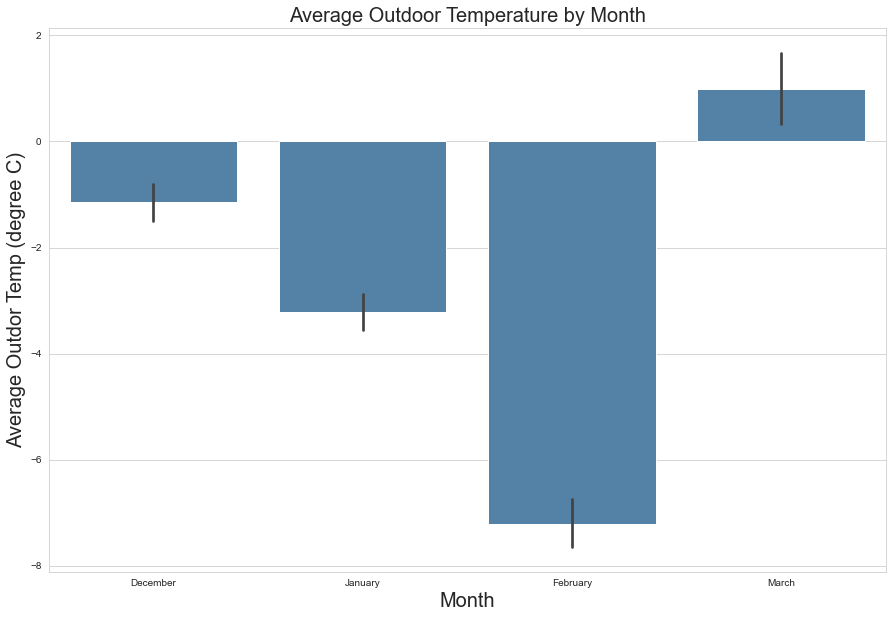

In [29]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')
averageTemp = sns.barplot(x = NG_Data['Month'], y = NG_Data['Ambient_temp_north_wall_C'], order = ['December','January','February','March'], color = 'steelblue')
averageTemp.set_xlabel('Month', fontsize = 20)
averageTemp.set_ylabel('Average Outdor Temp (degree C)', fontsize = 20)
plt.title('Average Outdoor Temperature by Month', fontsize = 20)
plt.show()